<a href="https://colab.research.google.com/github/ankitaggarwal64/Time-Series-Sales-Forecasting-for-Agricultural-Equipments/blob/main/Feature_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Feature Selection**

In order to select the relevant features which might help us in better predicting the sales, we decide to use the Boruta method.

Based on studies, Boruta feature selection algorithm has proven to be statistically grounded and works extremely well even without any specific input by the user. Two key ideas behind Boruta method.

1.   Shadow features: In this, features do not compete among themselves. Instead they compete with a randomized version of them.
2.   Binomial distribution :iteration is the key.

Based on the implementation of Boruta method for feature selection, we decided to select five variables corn1, hay2, ConstructionEm, wheat4, HOUST for further modelling. There is still some variables among these which have high correlation so we further explore VIF analysis before final modelling.VIF analysis can also help in provding insights about multicolinearity in variables.






**I. Feature Selection considering variables only with no significant missing values(data from starting 1990)**

In [6]:
#Import libraries
import pandas as pd
!pip install boruta
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from boruta import BorutaPy

In [2]:
#import data without predictors with significant missing values
data = pd.read_csv("/content/drive/My Drive/1. Data Science/Sales Forecasting_Masters Project/Masters Project/Data/Output_files/data_without_missvalcol.csv",parse_dates=['Time'], index_col='Time')

#Size of data - Sales and Indices
print(data.shape)

# displaying data
display(data)

(324, 35)


,Sales,corn1,corn3,wheat1,wheat2,wheat3,wheat4,hay2,dairy6,BRLCS_broilers,STRTXOK_beef_steers,FarmIncome,HOUST,RealGDP,Unemploy,Interest_US,ConsumerInflt,30YearMtggRate,ConstructionEm,ConsumerConfidenceI,livestock1_broilers_isNA,livestock2_beef_steers_isNA,livestock3_steers_isNA,livestock4_steers_isNA,livestock5_hog_isNA,livestock6_hog_isNA,wheat5_isNA,dairy1_isNA,dairy2_isNA,dairy3_isNA,dairy4_isNA,dairy5_isNA,BRLCS_broilers_isNA,STRTXOK_beef_steers_isNA,Non-ResidentialInvest_isNA
Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1990-01-31,505,239.83,2.31,402.53,396.76,429.99,3.71,93.3,15.5,0.51,79.06,46.26,1551.0,8947.1,5.4,10.11,1.28,9.90,5.42,106.5,1,0,1,1,1,1,1,1,1,1,1,1,1,0,1
1990-02-28,467,241.59,2.32,392.28,386.30,412.67,3.56,95.2,14.5,0.51,79.04,46.26,1437.0,8947.1,5.3,10.00,1.28,10.20,5.42,106.7,1,0,1,1,1,1,1,1,1,1,1,1,1,0,1
1990-03-31,467,250.58,2.37,387.13,377.33,403.26,3.48,96.7,13.9,0.51,79.16,46.26,1289.0,8947.1,5.2,10.00,1.29,10.27,5.39,110.6,1,0,1,1,1,1,1,1,1,1,1,1,1,0,1
1990-04-30,593,273.49,2.51,383.06,367.06,412.49,3.49,103.0,13.4,0.51,79.89,46.26,1248.0,8981.7,5.4,10.00,1.29,10.37,5.36,107.3,1,0,1,1,1,1,1,1,1,1,1,1,1,0,1
1990-05-31,866,284.34,2.62,371.44,365.44,389.52,3.40,104.0,13.5,0.51,78.28,46.26,1212.0,8981.7,5.4,10.00,1.29,10.48,5.32,107.3,1,0,1,1,1,1,1,1,1,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-31,102,323.04,3.21,398.89,407.10,414.74,3.67,138.0,17.2,0.80,116.55,65.86,1164.0,16727.0,4.9,3.50,2.40,3.44,6.70,101.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-09-30,200,328.90,3.22,375.02,390.98,424.61,3.49,137.0,17.4,0.78,106.08,65.86,1052.0,16727.0,4.9,3.50,2.41,3.46,6.73,103.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-10-31,611,349.49,3.29,381.28,408.77,440.15,3.68,135.0,16.7,0.71,100.37,65.86,1320.0,16813.3,4.8,3.50,2.42,3.47,6.74,100.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [3]:
# data without _isNA columns in data
data = data.iloc[:,0:20]
display(data)

,Sales,corn1,corn3,wheat1,wheat2,wheat3,wheat4,hay2,dairy6,BRLCS_broilers,STRTXOK_beef_steers,FarmIncome,HOUST,RealGDP,Unemploy,Interest_US,ConsumerInflt,30YearMtggRate,ConstructionEm,ConsumerConfidenceI
Time,,,,,,,,,,,,,,,,,,,,
1990-01-31,505,239.83,2.31,402.53,396.76,429.99,3.71,93.3,15.5,0.51,79.06,46.26,1551.0,8947.1,5.4,10.11,1.28,9.90,5.42,106.5
1990-02-28,467,241.59,2.32,392.28,386.30,412.67,3.56,95.2,14.5,0.51,79.04,46.26,1437.0,8947.1,5.3,10.00,1.28,10.20,5.42,106.7
1990-03-31,467,250.58,2.37,387.13,377.33,403.26,3.48,96.7,13.9,0.51,79.16,46.26,1289.0,8947.1,5.2,10.00,1.29,10.27,5.39,110.6
1990-04-30,593,273.49,2.51,383.06,367.06,412.49,3.49,103.0,13.4,0.51,79.89,46.26,1248.0,8981.7,5.4,10.00,1.29,10.37,5.36,107.3
1990-05-31,866,284.34,2.62,371.44,365.44,389.52,3.40,104.0,13.5,0.51,78.28,46.26,1212.0,8981.7,5.4,10.00,1.29,10.48,5.32,107.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-31,102,323.04,3.21,398.89,407.10,414.74,3.67,138.0,17.2,0.80,116.55,65.86,1164.0,16727.0,4.9,3.50,2.40,3.44,6.70,101.8
2016-09-30,200,328.90,3.22,375.02,390.98,424.61,3.49,137.0,17.4,0.78,106.08,65.86,1052.0,16727.0,4.9,3.50,2.41,3.46,6.73,103.5
2016-10-31,611,349.49,3.29,381.28,408.77,440.15,3.68,135.0,16.7,0.71,100.37,65.86,1320.0,16813.3,4.8,3.50,2.42,3.47,6.74,100.8


In [7]:
# load X and y
# NOTE BorutaPy accepts numpy arrays only, hence the .values attribute
X = data.iloc[:,1:20]
y = data.iloc[:,0]

# define random forest classifier, with utilising all cores and
# sampling in proportion to y labels
rf = RandomForestRegressor(n_jobs=-1,max_depth=5)

# define Boruta feature selection method
feat_selector = BorutaPy(rf, n_estimators='auto',max_iter = 100, random_state=1)

# find all relevant features
feat_selector.fit(np.array(X),np.array(y))

BorutaPy(alpha=0.05,
         estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                         criterion='mse', max_depth=5,
                                         max_features='auto',
                                         max_leaf_nodes=None, max_samples=None,
                                         min_impurity_decrease=0.0,
                                         min_impurity_split=None,
                                         min_samples_leaf=1,
                                         min_samples_split=2,
                                         min_weight_fraction_leaf=0.0,
                                         n_estimators=63, n_jobs=-1,
                                         oob_score=False,
                                         random_state=RandomState(MT19937) at 0x7F7FF7D82490,
                                         verbose=0, warm_start=False),
         max_iter=100, n_estimators='auto', perc=100,
         random_stat

In [8]:
# print results
green_area = X.columns[feat_selector.support_].to_list()
blue_area = X.columns[feat_selector.support_weak_].to_list()
print('features to keep(confirmed):', green_area)
print('features to keep(tentatively):', blue_area)

features to keep(confirmed): ['corn1', 'hay2', 'ConstructionEm']
features to keep(tentatively): ['wheat4', 'HOUST']


In [9]:
# Save selected features along with Sales data
data_boruta_select = data[['Sales']+ green_area + blue_area]
data_boruta_select.to_csv("/content/drive/My Drive/1. Data Science/Sales Forecasting_Masters Project/Masters Project/Data/Output_files/data_boruta_select.csv")

print(data_boruta_select.head())

            Sales   corn1   hay2  ConstructionEm  wheat4   HOUST
Time                                                            
1990-01-31    505  239.83   93.3            5.42    3.71  1551.0
1990-02-28    467  241.59   95.2            5.42    3.56  1437.0
1990-03-31    467  250.58   96.7            5.39    3.48  1289.0
1990-04-30    593  273.49  103.0            5.36    3.49  1248.0
1990-05-31    866  284.34  104.0            5.32    3.40  1212.0


**II. Feature Selection considering all variables(with data from 1999)**

In [11]:
#import data without predictors with significant missing values
data_after_1999 = pd.read_csv("/content/drive/My Drive/1. Data Science/Sales Forecasting_Masters Project/Masters Project/Data/Output_files/data_from_1999.csv",parse_dates=['Time'], index_col='Time')

#Size of data - Sales and Indices
print(data_after_1999.shape)

# displaying data
display(data_after_1999)

(216, 43)


,Sales,livestock4_steers,livestock5_hog,livestock6_hog,corn1,corn3,wheat1,wheat2,wheat3,wheat4,hay2,dairy1,dairy2,dairy3,dairy5,dairy6,BRLCS_broilers,STRTXOK_beef_steers,FarmIncome,Non-ResidentialInvest,HOUST,RealGDP,Unemploy,Interest_US,ConsumerInflt,30YearMtggRate,ConstructionEm,ConsumerConfidenceI,livestock1_broilers_isNA,livestock2_beef_steers_isNA,livestock3_steers_isNA,livestock4_steers_isNA,livestock5_hog_isNA,livestock6_hog_isNA,wheat5_isNA,dairy1_isNA,dairy2_isNA,dairy3_isNA,dairy4_isNA,dairy5_isNA,BRLCS_broilers_isNA,STRTXOK_beef_steers_isNA,Non-ResidentialInvest_isNA
Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1999-01-31,335,75.60,16.62,14.55,216.71,2.06,246.32,276.88,326.29,2.84,81.4,0.22,1.07,17.14,13.12,17.4,0.59,61.38,47.72,1459.0,1748.0,11864.7,4.3,7.75,1.65,6.79,6.36,128.9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1999-02-28,308,79.14,28.58,15.43,214.38,2.05,227.46,258.16,304.57,2.73,83.7,0.19,1.04,17.64,12.78,15.2,0.58,63.00,47.72,1459.0,1670.0,11864.7,4.4,7.75,1.65,6.81,6.43,133.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1999-03-31,395,81.14,28.25,18.41,219.86,2.06,235.65,268.10,303.12,2.65,83.2,0.19,1.02,16.57,12.36,15.2,0.57,64.83,47.72,1459.0,1710.0,11864.7,4.2,7.75,1.65,7.04,6.40,134.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1999-04-30,571,82.73,31.69,19.49,217.95,2.04,231.43,261.15,294.25,2.62,86.4,0.19,1.01,10.57,11.06,12.6,0.55,65.20,47.72,1497.3,1553.0,11962.5,4.3,7.75,1.66,6.92,6.48,135.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1999-05-31,367,81.08,38.45,25.28,217.89,1.99,224.46,254.01,288.89,2.49,91.0,0.17,1.01,11.92,11.62,12.8,0.60,65.00,47.72,1497.3,1611.0,11962.5,4.2,7.75,1.66,7.15,6.52,137.7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-31,102,151.20,48.12,47.38,323.04,3.21,398.89,407.10,414.74,3.67,138.0,0.28,0.86,15.21,14.65,17.2,0.80,116.55,65.86,2192.5,1164.0,16727.0,4.9,3.50,2.40,3.44,6.70,101.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-09-30,200,138.38,43.36,42.83,328.90,3.22,375.02,390.98,424.61,3.49,137.0,0.30,0.88,14.66,14.25,17.4,0.78,106.08,65.86,2192.5,1052.0,16727.0,4.9,3.50,2.41,3.46,6.73,103.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-10-31,611,121.82,37.07,30.84,349.49,3.29,381.28,408.77,440.15,3.68,135.0,0.33,0.92,14.09,13.66,16.7,0.71,100.37,65.86,2197.2,1320.0,16813.3,4.8,3.50,2.42,3.47,6.74,100.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
# data without _isNA columns in data
data_after_1999 = data_after_1999.iloc[:,0:28]
display(data_after_1999)

,Sales,livestock4_steers,livestock5_hog,livestock6_hog,corn1,corn3,wheat1,wheat2,wheat3,wheat4,hay2,dairy1,dairy2,dairy3,dairy5,dairy6,BRLCS_broilers,STRTXOK_beef_steers,FarmIncome,Non-ResidentialInvest,HOUST,RealGDP,Unemploy,Interest_US,ConsumerInflt,30YearMtggRate,ConstructionEm,ConsumerConfidenceI
Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1999-01-31,335,75.60,16.62,14.55,216.71,2.06,246.32,276.88,326.29,2.84,81.4,0.22,1.07,17.14,13.12,17.4,0.59,61.38,47.72,1459.0,1748.0,11864.7,4.3,7.75,1.65,6.79,6.36,128.9
1999-02-28,308,79.14,28.58,15.43,214.38,2.05,227.46,258.16,304.57,2.73,83.7,0.19,1.04,17.64,12.78,15.2,0.58,63.00,47.72,1459.0,1670.0,11864.7,4.4,7.75,1.65,6.81,6.43,133.1
1999-03-31,395,81.14,28.25,18.41,219.86,2.06,235.65,268.10,303.12,2.65,83.2,0.19,1.02,16.57,12.36,15.2,0.57,64.83,47.72,1459.0,1710.0,11864.7,4.2,7.75,1.65,7.04,6.40,134.0
1999-04-30,571,82.73,31.69,19.49,217.95,2.04,231.43,261.15,294.25,2.62,86.4,0.19,1.01,10.57,11.06,12.6,0.55,65.20,47.72,1497.3,1553.0,11962.5,4.3,7.75,1.66,6.92,6.48,135.5
1999-05-31,367,81.08,38.45,25.28,217.89,1.99,224.46,254.01,288.89,2.49,91.0,0.17,1.01,11.92,11.62,12.8,0.60,65.00,47.72,1497.3,1611.0,11962.5,4.2,7.75,1.66,7.15,6.52,137.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-31,102,151.20,48.12,47.38,323.04,3.21,398.89,407.10,414.74,3.67,138.0,0.28,0.86,15.21,14.65,17.2,0.80,116.55,65.86,2192.5,1164.0,16727.0,4.9,3.50,2.40,3.44,6.70,101.8
2016-09-30,200,138.38,43.36,42.83,328.90,3.22,375.02,390.98,424.61,3.49,137.0,0.30,0.88,14.66,14.25,17.4,0.78,106.08,65.86,2192.5,1052.0,16727.0,4.9,3.50,2.41,3.46,6.73,103.5
2016-10-31,611,121.82,37.07,30.84,349.49,3.29,381.28,408.77,440.15,3.68,135.0,0.33,0.92,14.09,13.66,16.7,0.71,100.37,65.86,2197.2,1320.0,16813.3,4.8,3.50,2.42,3.47,6.74,100.8


In [13]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from boruta import BorutaPy

# load X and y
# NOTE BorutaPy accepts numpy arrays only, hence the .values attribute
X = data_after_1999.iloc[:,1:]
y = data_after_1999.iloc[:,0]

# define random forest classifier, with utilising all cores and
# sampling in proportion to y labels
rf = RandomForestRegressor(n_jobs=-1,max_depth=5)

# define Boruta feature selection method
feat_selector = BorutaPy(rf, n_estimators='auto',max_iter = 100, random_state=1)

# find all relevant features
feat_selector.fit(np.array(X),np.array(y))

BorutaPy(alpha=0.05,
         estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                         criterion='mse', max_depth=5,
                                         max_features='auto',
                                         max_leaf_nodes=None, max_samples=None,
                                         min_impurity_decrease=0.0,
                                         min_impurity_split=None,
                                         min_samples_leaf=1,
                                         min_samples_split=2,
                                         min_weight_fraction_leaf=0.0,
                                         n_estimators=63, n_jobs=-1,
                                         oob_score=False,
                                         random_state=RandomState(MT19937) at 0x7F7FF7D827C0,
                                         verbose=0, warm_start=False),
         max_iter=100, n_estimators='auto', perc=100,
         random_stat

In [15]:
# print results
green_area = X.columns[feat_selector.support_].to_list()
blue_area = X.columns[feat_selector.support_weak_].to_list()
print('features to keep(confirmed):', green_area)
print('features to keep(tentatively):', blue_area)

#Observation : All the three varaibles selected here were already in feature selection with limited variable above(data from 1990)( as wheat2 is highly correlated to wheat4)

features to keep(confirmed): ['HOUST', 'ConstructionEm']
features to keep(tentatively): ['wheat3']


**Based on above feature selection analysis (I & II)**, we will consider all 5 variables (corn1,    hay2, ConstructionEm, wheat4, HOUST) for further modelling

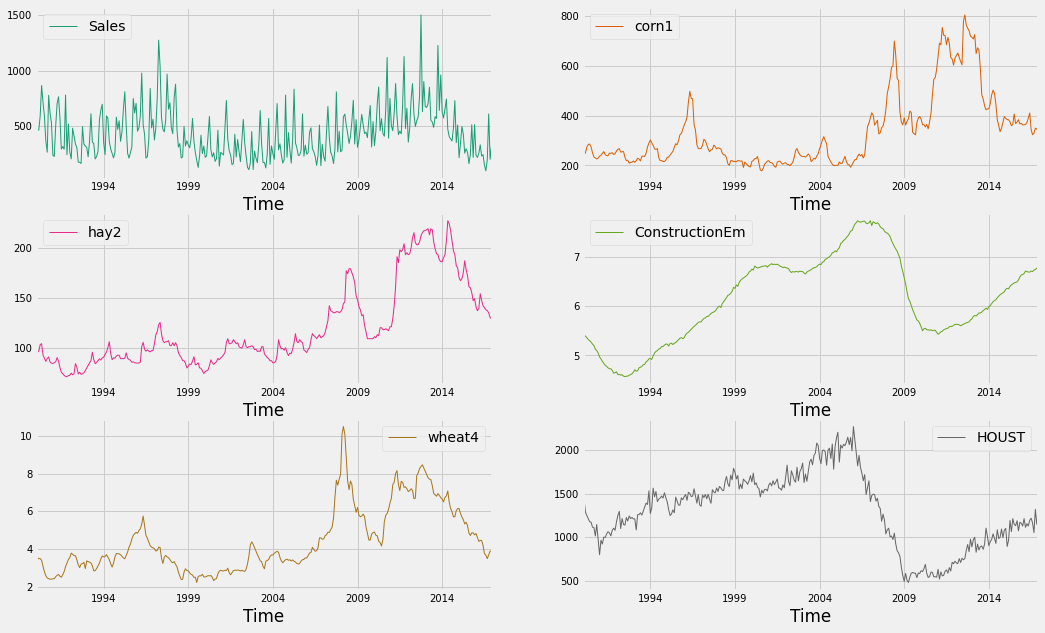

In [16]:
# Ploting Sales along with selected features
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
ax = data_boruta_select.plot(subplots= True,linewidth=1,layout =(3,2),sharex=False,sharey=False,colormap = "Dark2", figsize=(16,10),fontsize=10)
plt.show()

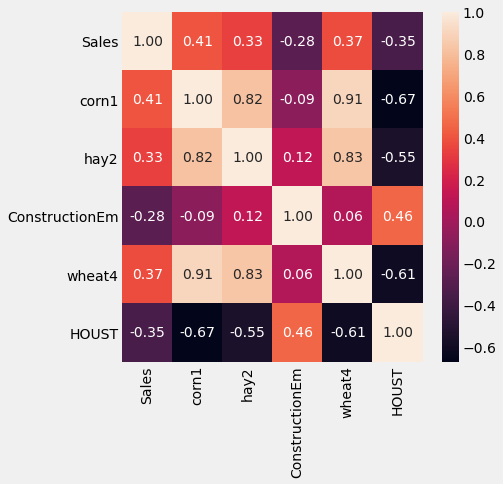

In [ ]:
# Plotting correlation heat map
import seaborn as sns
fig, ax = plt.subplots(figsize=(6,6))  
sns.heatmap(data_boruta_select.corr(),annot=True,fmt =".2f")

In [17]:
# Creating dataframe with Average Monthly Values
df = data_boruta_select.reset_index()
df["Time"]= pd.to_datetime(df["Time"])
monthly_avg = df.groupby(df['Time'].dt.strftime('%B'))[list(data_boruta_select.columns)].mean().sort_values(by="Time")
display(monthly_avg)

,Sales,corn1,hay2,ConstructionEm,wheat4,HOUST
Time,,,,,,
April,697.407407,346.594074,121.751852,6.122222,4.546296,1297.037037
August,273.888889,322.858519,119.262963,6.140370,4.251852,1295.703704
December,513.222222,325.861481,115.029630,6.157778,4.476667,1321.222222
February,336.925926,336.426296,114.370370,6.108889,4.543704,1324.148148
January,342.666667,332.604815,113.222222,6.111111,4.486296,1318.259259
July,306.962963,335.525556,120.685185,6.134815,4.140000,1311.185185
June,372.740741,347.350370,123.381481,6.130000,4.263333,1301.259259
March,525.666667,343.888519,116.422222,6.118148,4.562593,1294.037037
May,463.333333,348.344444,129.414815,6.125185,4.500741,1301.333333


In [18]:
# Sorting Dataframe by Calender months
!pip install sorted-months-weekdays
!pip install sort-dataframeby-monthorweek

from sorted_months_weekdays import *
from sort_dataframeby_monthorweek import *

monthly_avg = monthly_avg.reset_index()
monthly_avg = pd.DataFrame(Sort_Dataframeby_Month(df=monthly_avg,monthcolumnname='Time'))
monthly_avg = monthly_avg.set_index(["Time"])
display(monthly_avg)

  Created wheel for sorted-months-weekdays: filename=sorted_months_weekdays-0.2-cp37-none-any.whl size=3237 sha256=ae2173af23b92225004bcf3d1f9414555501dae5e578a2e722fbf70e6781d6b4
  Stored in directory: /root/.cache/pip/wheels/11/2f/19/05e3f8e6a6d06a2e962f0a172bc9736451f6518e2db6d1ab6d
Successfully built sorted-months-weekdays
  Created wheel for sort-dataframeby-monthorweek: filename=sort_dataframeby_monthorweek-0.4-cp37-none-any.whl size=3437 sha256=34498f4368588425cccb6f19f691e51f3cfbc6fadcb84501f641aedc5cc157b2
  Stored in directory: /root/.cache/pip/wheels/4c/35/02/083a8cdd13de15416e153a50324450c15189d259c861f9f964
Successfully built sort-dataframeby-monthorweek


,Sales,corn1,hay2,ConstructionEm,wheat4,HOUST
Time,,,,,,
January,342.666667,332.604815,113.222222,6.111111,4.486296,1318.259259
February,336.925926,336.426296,114.370370,6.108889,4.543704,1324.148148
March,525.666667,343.888519,116.422222,6.118148,4.562593,1294.037037
April,697.407407,346.594074,121.751852,6.122222,4.546296,1297.037037
May,463.333333,348.344444,129.414815,6.125185,4.500741,1301.333333
June,372.740741,347.350370,123.381481,6.130000,4.263333,1301.259259
July,306.962963,335.525556,120.685185,6.134815,4.140000,1311.185185
August,273.888889,322.858519,119.262963,6.140370,4.251852,1295.703704
September,354.259259,321.669630,118.370370,6.145556,4.344815,1300.074074


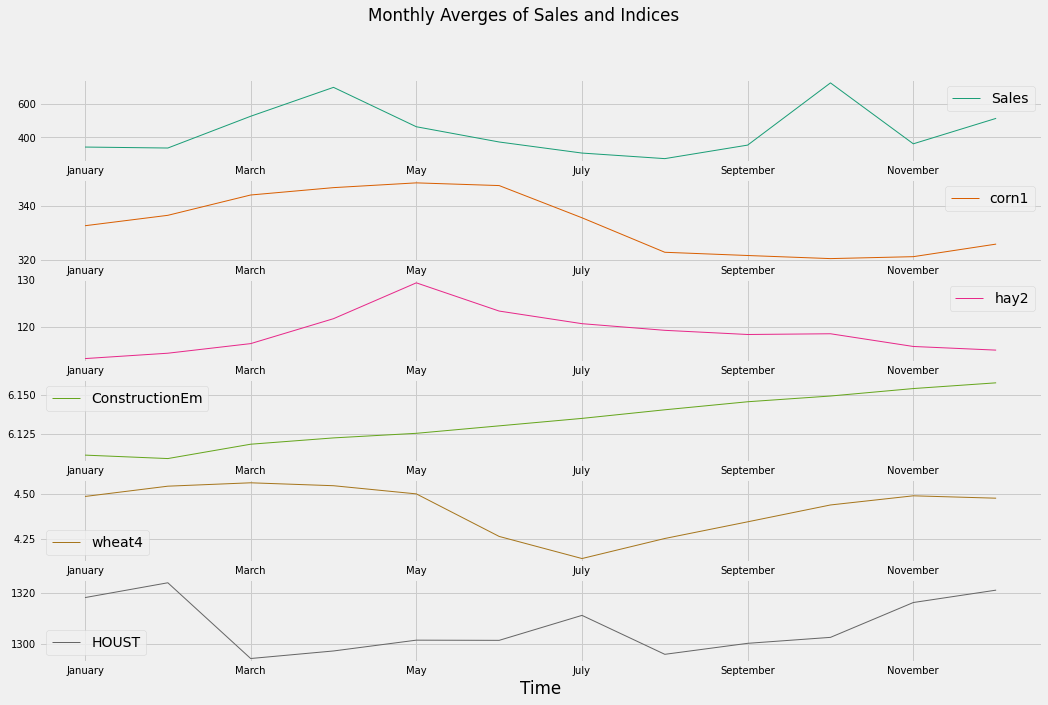

In [ ]:
# Plotting Monthly Averages of Sales and Indices
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
monthly_avg.plot(subplots= True,linewidth=1,layout =(6,1),sharex=False,sharey=False,colormap = "Dark2", figsize=(16,10),fontsize=10,title="Monthly Averges of Sales and Indices")
plt.show()

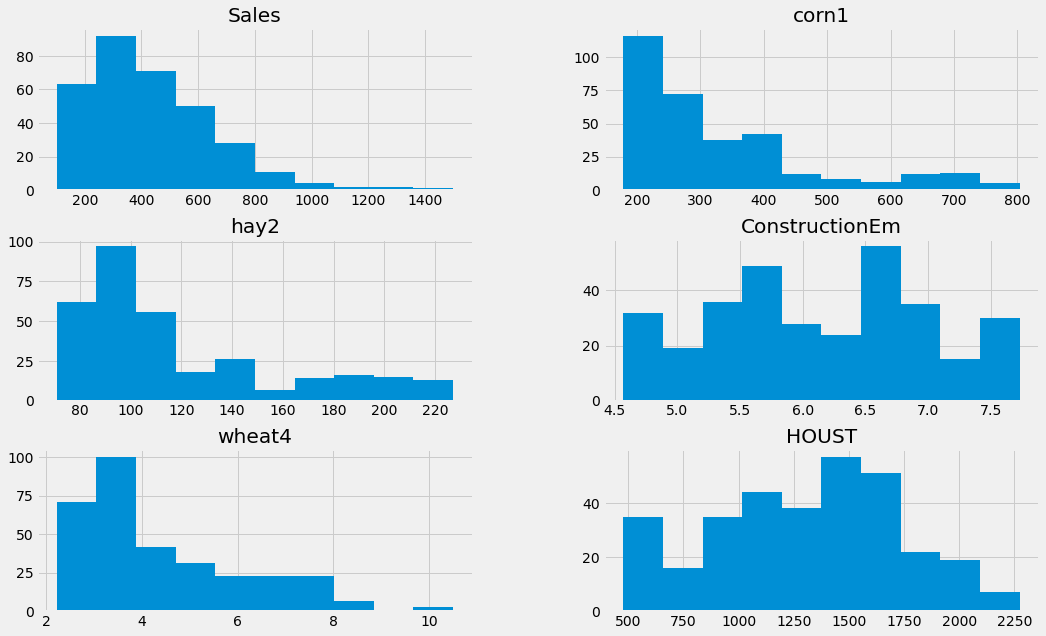

In [19]:
# Plot distributions
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
data_boruta_select.hist(figsize=(16,10))
plt.show()

**Conclusion** : We will consider all five variables corn1, hay2, ConstructionEm, wheat4, HOUST for further modelling. We can further explore VIF analysis to explore multicolinearity in variables.


References:


1.   https://towardsdatascience.com/boruta-explained-the-way-i-wish-someone-explained-it-to-me-4489d70e154a
2.   https://github.com/scikit-learn-contrib/boruta_py

